# Hoge-orde | Euler | Heun
- Gebruik zowel forward Euler-integratie als Heun-integratie om de vergelijking u' (t) = u(t) (met beginconditie u(0) = 1) op te lossen. 
- Maak plots van de twee benaderingen tussen t = 0 en t = 1  en laat het verschil in nauwkeurigheid van de twee methoden zien. 

- Varieer het aantal stappen n tussen t = 0 en t = 1. Laat voor n = 5,10,20 en 100 zien wat de benadering is van u(1) = e.


In [87]:
import math
import matplotlib.pyplot as plt 
import numpy

In [88]:
h_array = []
euler_error_array = []
heuns_error_array = []

In [92]:
def heuns_method(num_steps):
    ###Original Euler Method
    h = 0.01

    x = numpy.zeros([num_steps + 1, 2]) # m
    v = numpy.zeros([num_steps + 1, 2]) # m / s

    x[0, 0] = 0 
    v[0, 1] = 1

    for step in range(num_steps):
        x[step + 1] = x[step] + h * v[step]
        v[step + 1] = v[step] + h * x[step]

    error = numpy.linalg.norm(x[-1] - x[0])
    h_array.append(h)
    euler_error_array.append(error)
    ###End Original Euler Method

    ###Heun's Method
    for step in range(num_steps):
        xE = x[step] + h * v[step]
        vE = v[step] + h 
        x[step + 1] = x[step] + h * 0.5 * (v[step] + vE)
        v[step + 1] = v[step] + h * 0.5

    error = numpy.linalg.norm(x[-1] - x[0])
    heuns_error_array.append(error)

    ###End Heun's Method

    return x, v, error

for num_steps in [50, 100, 200, 500, 1000]:
    x, v, error = heuns_method(num_steps) #Check x, v, error

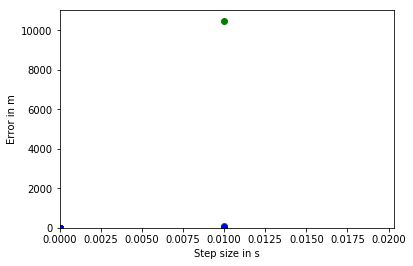

In [93]:
def plot_me():
    plt.scatter(h_array, euler_error_array, c = 'g')
    plt.scatter(h_array, heuns_error_array, c = 'b')
    plt.xlim(xmin = 0.)
    plt.ylim(ymin = 0.)
    axes = plt.gca()
    axes.set_xlabel('Step size in s')
    axes.set_ylabel('Error in m')
    
plot_me()